In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
#import chartify
from sklearn.utils import shuffle
#import graphlab
import warnings
warnings.filterwarnings('ignore')#, category=DeprecationWarning) 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

/anaconda/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


**Setting path for data files**

In [78]:
path1 = '/Users/junaidqazi-13/Desktop/_SFU_MS_BigData/Sem_1/ML_726_SFU/Data_ML_Proj'
path = path1+'/green_clean_2017_1.csv'
path_weather = path1+'/nyc_weather_2017.csv'
path_weather

'/Users/junaidqazi-13/Desktop/_SFU_MS_BigData/Sem_1/ML_726_SFU/Data_ML_Proj/nyc_weather_2017.csv'

## Exploring weather data

In [148]:
dfw = pd.read_csv(path_weather)

In [149]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
STATION            365 non-null object
NAME               365 non-null object
DATE               365 non-null object
TAVG               0 non-null float64
TAVG_ATTRIBUTES    0 non-null float64
TMAX               365 non-null int64
TMAX_ATTRIBUTES    365 non-null object
TMIN               365 non-null int64
TMIN_ATTRIBUTES    365 non-null object
WT01               146 non-null float64
WT01_ATTRIBUTES    146 non-null object
WT02               13 non-null float64
WT02_ATTRIBUTES    13 non-null object
WT03               0 non-null float64
WT03_ATTRIBUTES    0 non-null float64
WT04               1 non-null float64
WT04_ATTRIBUTES    1 non-null object
WT06               1 non-null float64
WT06_ATTRIBUTES    1 non-null object
WT08               66 non-null float64
WT08_ATTRIBUTES    66 non-null object
dtypes: float64(9), int64(2), object(10)
memory usage: 60.0+ KB


### getting list of all the columns

In [150]:
dfw.columns

Index(['STATION', 'NAME', 'DATE', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX',
       'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES',
       'WT02', 'WT02_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'WT04',
       'WT04_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES', 'WT08',
       'WT08_ATTRIBUTES'],
      dtype='object')

### dropping the once with missing data

In [151]:
dfw = dfw[['STATION', 'NAME', 'DATE', 'TMAX',
       'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES']]

In [152]:
dfw.head()

,STATION,NAME,DATE,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,WT01,WT01_ATTRIBUTES
0,USW00094728,"NY CITY CENTRAL PARK, NY US",2017-01-01,48,",,W",40,",,W",NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",2017-01-02,41,",,W",37,",,W",1.0,",,W"
2,USW00094728,"NY CITY CENTRAL PARK, NY US",2017-01-03,43,",,W",39,",,W",1.0,",,W"
3,USW00094728,"NY CITY CENTRAL PARK, NY US",2017-01-04,52,",,W",34,",,W",1.0,",,W"
4,USW00094728,"NY CITY CENTRAL PARK, NY US",2017-01-05,34,",,W",27,",,W",NaN,NaN


In [153]:
dfw.count()

STATION            365
NAME               365
DATE               365
TMAX               365
TMAX_ATTRIBUTES    365
TMIN               365
TMIN_ATTRIBUTES    365
WT01               146
WT01_ATTRIBUTES    146
dtype: int64

In [154]:
# Lets check the unique values in attributes!

In [155]:
dfw.TMAX_ATTRIBUTES.nunique(), dfw.TMIN_ATTRIBUTES.nunique(), dfw.WT01.nunique(), dfw.WT01_ATTRIBUTES.nunique()

(1, 1, 1, 1)

So, we don't want these columns as well. They are always 1.<br>
`TMAX_ATTRIBUTES, TMIN_ATTRIBUTES, WT01, WT01_ATTRIBUTES` Let's drop them!

In [156]:
dfw = dfw.drop(['TMAX_ATTRIBUTES', 
                'TMIN_ATTRIBUTES', 
                'WT01', 'WT01_ATTRIBUTES'], axis = 1)

In [157]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
STATION    365 non-null object
NAME       365 non-null object
DATE       365 non-null object
TMAX       365 non-null int64
TMIN       365 non-null int64
dtypes: int64(2), object(3)
memory usage: 14.3+ KB


In [158]:
#its easier to have date columns with same name for joining
dfw['date'] = dfw['DATE']
dfw.drop(['DATE'], axis =1, inplace = True)

In [159]:
dfw.head()

,STATION,NAME,TMAX,TMIN,date
0,USW00094728,"NY CITY CENTRAL PARK, NY US",48,40,2017-01-01
1,USW00094728,"NY CITY CENTRAL PARK, NY US",41,37,2017-01-02
2,USW00094728,"NY CITY CENTRAL PARK, NY US",43,39,2017-01-03
3,USW00094728,"NY CITY CENTRAL PARK, NY US",52,34,2017-01-04
4,USW00094728,"NY CITY CENTRAL PARK, NY US",34,27,2017-01-05


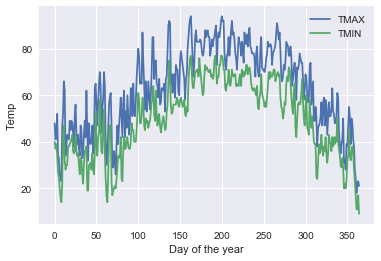

In [160]:
plt.plot(dfw.TMAX), plt.plot(dfw.TMIN)
plt.xlabel('Day of the year')
plt.ylabel('Temp')
plt.legend()

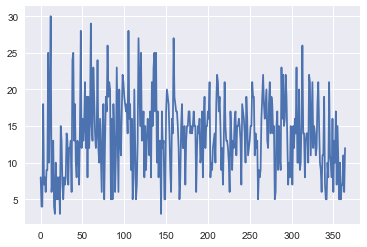

In [161]:
plt.plot(dfw.TMAX-dfw.TMIN)

**No solid trend in the temp difference.....no need to consider**

In [162]:
dfw.columns

Index(['STATION', 'NAME', 'TMAX', 'TMIN', 'date'], dtype='object')

In [163]:
#so we need only date and TMAX
dfw = dfw[['date', 'TMAX']]

In [164]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
date    365 non-null object
TMAX    365 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


### Checking already cleaned nyc taxi data

In [165]:
dft = pd.read_csv(path)

In [166]:
#df['poi-1']/83
dft.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,dispatch,PUT,DOT,date
0,2,1,75,41,2,1.36,6.5,0.0,0.5,0.00,0.0,0.3,7.30,2,1.0,1,11:07:56,11:13:00,2017-01-06
1,1,1,95,95,1,0.70,4.0,0.5,0.5,1.30,0.0,0.3,6.60,1,1.0,1,04:00:07,04:02:34,2017-05-18
2,2,1,196,56,5,0.87,5.5,0.5,0.5,0.00,0.0,0.3,6.80,2,1.0,1,22:59:17,23:03:47,2017-02-21
3,2,1,65,225,2,4.65,20.5,1.0,0.5,4.46,0.0,0.3,26.76,1,1.0,1,19:05:09,19:32:57,2017-12-22
4,2,1,82,95,5,2.17,9.0,0.0,0.5,0.00,0.0,0.3,9.80,2,1.0,1,06:21:34,06:29:59,2017-11-12


In [170]:
dft.count()

VendorID                 2314057
RatecodeID               2314057
PULocationID             2314057
DOLocationID             2314057
passenger_count          2314057
trip_distance            2314057
fare_amount              2314057
extra                    2314057
mta_tax                  2314057
tip_amount               2314057
tolls_amount             2314057
improvement_surcharge    2314057
total_amount             2314057
payment_type             2314057
trip_type                2314051
dispatch                 2314057
PUT                      2314057
DOT                      2314057
date                     2314057
dtype: int64

In [171]:
dft['PickUp_hr'] = pd.to_datetime(dft['PUT']).dt.hour
#df.PUT[0]

In [172]:
dft.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,dispatch,PUT,DOT,date,PickUp_hr
0,2,1,75,41,2,1.36,6.5,0.0,0.5,0.00,0.0,0.3,7.30,2,1.0,1,11:07:56,11:13:00,2017-01-06,11
1,1,1,95,95,1,0.70,4.0,0.5,0.5,1.30,0.0,0.3,6.60,1,1.0,1,04:00:07,04:02:34,2017-05-18,4
2,2,1,196,56,5,0.87,5.5,0.5,0.5,0.00,0.0,0.3,6.80,2,1.0,1,22:59:17,23:03:47,2017-02-21,22
3,2,1,65,225,2,4.65,20.5,1.0,0.5,4.46,0.0,0.3,26.76,1,1.0,1,19:05:09,19:32:57,2017-12-22,19
4,2,1,82,95,5,2.17,9.0,0.0,0.5,0.00,0.0,0.3,9.80,2,1.0,1,06:21:34,06:29:59,2017-11-12,6


In [173]:
dft.count()

VendorID                 2314057
RatecodeID               2314057
PULocationID             2314057
DOLocationID             2314057
passenger_count          2314057
trip_distance            2314057
fare_amount              2314057
extra                    2314057
mta_tax                  2314057
tip_amount               2314057
tolls_amount             2314057
improvement_surcharge    2314057
total_amount             2314057
payment_type             2314057
trip_type                2314051
dispatch                 2314057
PUT                      2314057
DOT                      2314057
date                     2314057
PickUp_hr                2314057
dtype: int64

In [174]:
dfw.count()

date    365
TMAX    365
dtype: int64

## merging the data on date

In [175]:
df=dft.merge(dfw, on='date')

In [176]:
df.count()

VendorID                 2314019
RatecodeID               2314019
PULocationID             2314019
DOLocationID             2314019
passenger_count          2314019
trip_distance            2314019
fare_amount              2314019
extra                    2314019
mta_tax                  2314019
tip_amount               2314019
tolls_amount             2314019
improvement_surcharge    2314019
total_amount             2314019
payment_type             2314019
trip_type                2314013
dispatch                 2314019
PUT                      2314019
DOT                      2314019
date                     2314019
PickUp_hr                2314019
TMAX                     2314019
dtype: int64

In [177]:
# we have our dataframe df, saving some memore
del dfw
del dft

## So now we have a combined `dataframe` with weather and taxi related stuff in `df`

In [178]:
# In case there is an null value!
df.dropna();

In [179]:
df.count()

VendorID                 2314019
RatecodeID               2314019
PULocationID             2314019
DOLocationID             2314019
passenger_count          2314019
trip_distance            2314019
fare_amount              2314019
extra                    2314019
mta_tax                  2314019
tip_amount               2314019
tolls_amount             2314019
improvement_surcharge    2314019
total_amount             2314019
payment_type             2314019
trip_type                2314013
dispatch                 2314019
PUT                      2314019
DOT                      2314019
date                     2314019
PickUp_hr                2314019
TMAX                     2314019
dtype: int64

In [180]:
df.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'dispatch', 'PUT', 'DOT', 'date',
       'PickUp_hr', 'TMAX'],
      dtype='object')

In [181]:
df.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,dispatch,PUT,DOT,date,PickUp_hr,TMAX
0,2,1,75,41,2,1.36,6.5,0.0,0.5,0.0,...,0.3,7.3,2,1.0,1,11:07:56,11:13:00,2017-01-06,11,33
1,2,1,65,217,1,2.90,14.5,0.0,0.5,0.0,...,0.3,15.3,2,1.0,1,11:01:58,11:20:35,2017-01-06,11,33
2,2,1,168,74,2,1.51,9.5,0.0,0.5,0.0,...,0.3,10.3,2,1.0,1,14:03:08,14:15:02,2017-01-06,14,33
3,2,1,173,129,1,1.00,6.0,0.5,0.5,1.0,...,0.3,8.3,1,1.0,1,06:01:10,06:06:28,2017-01-06,6,33
4,2,1,181,91,6,4.77,16.5,0.5,0.5,0.0,...,0.3,17.8,2,1.0,1,22:15:13,22:32:26,2017-01-06,22,33


In [182]:
df['day'] = pd.to_datetime(df['date']).dt.day

In [183]:
df['month'] = pd.to_datetime(df['date']).dt.month

In [184]:
#maming sure we have all the (max month day 31) days and all the month (12 months)
df.day.nunique(), df.month.nunique()

(31, 12)

In [185]:
df.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'dispatch', 'PUT', 'DOT', 'date',
       'PickUp_hr', 'TMAX', 'day', 'month'],
      dtype='object')

In [186]:
df.count()

VendorID                 2314019
RatecodeID               2314019
PULocationID             2314019
DOLocationID             2314019
passenger_count          2314019
trip_distance            2314019
fare_amount              2314019
extra                    2314019
mta_tax                  2314019
tip_amount               2314019
tolls_amount             2314019
improvement_surcharge    2314019
total_amount             2314019
payment_type             2314019
trip_type                2314013
dispatch                 2314019
PUT                      2314019
DOT                      2314019
date                     2314019
PickUp_hr                2314019
TMAX                     2314019
day                      2314019
month                    2314019
dtype: int64

In [187]:
df_time = df[['PUT', 'DOT']]

In [188]:
#df_time = df[.apply(pd.to_timedelta)

## Creating another feature -- ride time 

In [189]:
df_time = df_time.apply(pd.to_timedelta)

In [190]:
df_time_diff = df_time.DOT - df_time.PUT

In [191]:
df['ride_time'] = df_time.DOT - df_time.PUT

In [192]:
df.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,trip_type,dispatch,PUT,DOT,date,PickUp_hr,TMAX,day,month,ride_time
0,2,1,75,41,2,1.36,6.5,0.0,0.5,0.0,...,1.0,1,11:07:56,11:13:00,2017-01-06,11,33,6,1,00:05:04
1,2,1,65,217,1,2.90,14.5,0.0,0.5,0.0,...,1.0,1,11:01:58,11:20:35,2017-01-06,11,33,6,1,00:18:37
2,2,1,168,74,2,1.51,9.5,0.0,0.5,0.0,...,1.0,1,14:03:08,14:15:02,2017-01-06,14,33,6,1,00:11:54
3,2,1,173,129,1,1.00,6.0,0.5,0.5,1.0,...,1.0,1,06:01:10,06:06:28,2017-01-06,6,33,6,1,00:05:18
4,2,1,181,91,6,4.77,16.5,0.5,0.5,0.0,...,1.0,1,22:15:13,22:32:26,2017-01-06,22,33,6,1,00:17:13


In [193]:
df.count()

VendorID                 2314019
RatecodeID               2314019
PULocationID             2314019
DOLocationID             2314019
passenger_count          2314019
trip_distance            2314019
fare_amount              2314019
extra                    2314019
mta_tax                  2314019
tip_amount               2314019
tolls_amount             2314019
improvement_surcharge    2314019
total_amount             2314019
payment_type             2314019
trip_type                2314013
dispatch                 2314019
PUT                      2314019
DOT                      2314019
date                     2314019
PickUp_hr                2314019
TMAX                     2314019
day                      2314019
month                    2314019
ride_time                2314019
dtype: int64

In [194]:
# saving memory
del df_time
del df_time_diff

In [195]:
df['ride_time_sec'] = df['ride_time'].dt.total_seconds()

In [196]:
df.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,dispatch,PUT,DOT,date,PickUp_hr,TMAX,day,month,ride_time,ride_time_sec
0,2,1,75,41,2,1.36,6.5,0.0,0.5,0.0,...,1,11:07:56,11:13:00,2017-01-06,11,33,6,1,00:05:04,304.0
1,2,1,65,217,1,2.90,14.5,0.0,0.5,0.0,...,1,11:01:58,11:20:35,2017-01-06,11,33,6,1,00:18:37,1117.0
2,2,1,168,74,2,1.51,9.5,0.0,0.5,0.0,...,1,14:03:08,14:15:02,2017-01-06,14,33,6,1,00:11:54,714.0
3,2,1,173,129,1,1.00,6.0,0.5,0.5,1.0,...,1,06:01:10,06:06:28,2017-01-06,6,33,6,1,00:05:18,318.0
4,2,1,181,91,6,4.77,16.5,0.5,0.5,0.0,...,1,22:15:13,22:32:26,2017-01-06,22,33,6,1,00:17:13,1033.0


In [197]:
df.count()

VendorID                 2314019
RatecodeID               2314019
PULocationID             2314019
DOLocationID             2314019
passenger_count          2314019
trip_distance            2314019
fare_amount              2314019
extra                    2314019
mta_tax                  2314019
tip_amount               2314019
tolls_amount             2314019
improvement_surcharge    2314019
total_amount             2314019
payment_type             2314019
trip_type                2314013
dispatch                 2314019
PUT                      2314019
DOT                      2314019
date                     2314019
PickUp_hr                2314019
TMAX                     2314019
day                      2314019
month                    2314019
ride_time                2314019
ride_time_sec            2314019
dtype: int64

### Checking for the rides with more than 1 hr long

In [198]:
#df.loc[df['ride_time'].idxmax()]
df_time_over_1hr = df[df['ride_time_sec'] > 3600.00]#.count()

In [199]:
#plt.plot(df['ride_time'].dt.total_seconds()/3600)

In [200]:
#df['ride_time']

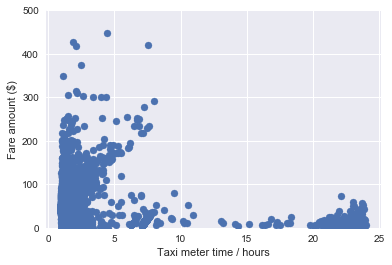

In [201]:
plt.scatter(df_time_over_1hr.ride_time_sec/3600, df_time_over_1hr.fare_amount)
plt.ylim(0,500)
plt.xlabel('Taxi meter time / hours')
plt.ylabel('Fare amount ($)')

### Checking for the rides with under 1 hr long

In [202]:
#Checking for the time with 
df_time_under_1hr = df[df['ride_time_sec'] < 3600.00]#.count()

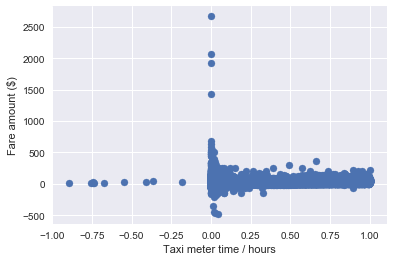

In [203]:
plt.scatter(df_time_under_1hr.ride_time_sec/3600, df_time_under_1hr.fare_amount)
#plt.ylim(0,500)
plt.xlabel('Taxi meter time / hours')
plt.ylabel('Fare amount ($)')

### So, we have some strange entries, getting rid of the rides longer than 1 hr, less than 0 hr and all those with negative fare and fare above 500 dollars and of less time (e.g. 1 min) 

In [204]:
df.count()

VendorID                 2314019
RatecodeID               2314019
PULocationID             2314019
DOLocationID             2314019
passenger_count          2314019
trip_distance            2314019
fare_amount              2314019
extra                    2314019
mta_tax                  2314019
tip_amount               2314019
tolls_amount             2314019
improvement_surcharge    2314019
total_amount             2314019
payment_type             2314019
trip_type                2314013
dispatch                 2314019
PUT                      2314019
DOT                      2314019
date                     2314019
PickUp_hr                2314019
TMAX                     2314019
day                      2314019
month                    2314019
ride_time                2314019
ride_time_sec            2314019
dtype: int64

In [205]:
# saving memory
del df_time_under_1hr
del df_time_over_1hr

In [206]:
# saving in middle to save time, in case the kernal is broken
#df.to_csv('mid_way.csv', index=False)

In [207]:
#df.head()

In [208]:
#df = pd.read_csv('mid_way.csv')
#df.head()

In [209]:
df = df.drop('ride_time', axis = 1)
df.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,trip_type,dispatch,PUT,DOT,date,PickUp_hr,TMAX,day,month,ride_time_sec
0,2,1,75,41,2,1.36,6.5,0.0,0.5,0.0,...,1.0,1,11:07:56,11:13:00,2017-01-06,11,33,6,1,304.0
1,2,1,65,217,1,2.90,14.5,0.0,0.5,0.0,...,1.0,1,11:01:58,11:20:35,2017-01-06,11,33,6,1,1117.0
2,2,1,168,74,2,1.51,9.5,0.0,0.5,0.0,...,1.0,1,14:03:08,14:15:02,2017-01-06,14,33,6,1,714.0
3,2,1,173,129,1,1.00,6.0,0.5,0.5,1.0,...,1.0,1,06:01:10,06:06:28,2017-01-06,6,33,6,1,318.0
4,2,1,181,91,6,4.77,16.5,0.5,0.5,0.0,...,1.0,1,22:15:13,22:32:26,2017-01-06,22,33,6,1,1033.0


In [210]:
df.count()

VendorID                 2314019
RatecodeID               2314019
PULocationID             2314019
DOLocationID             2314019
passenger_count          2314019
trip_distance            2314019
fare_amount              2314019
extra                    2314019
mta_tax                  2314019
tip_amount               2314019
tolls_amount             2314019
improvement_surcharge    2314019
total_amount             2314019
payment_type             2314019
trip_type                2314013
dispatch                 2314019
PUT                      2314019
DOT                      2314019
date                     2314019
PickUp_hr                2314019
TMAX                     2314019
day                      2314019
month                    2314019
ride_time_sec            2314019
dtype: int64

# saving a file in case kernel issue

In [211]:
# saving in middle to save time, in case the kernal is broken
df.to_csv('mid_way.csv', index=False)

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,trip_type,dispatch,PUT,DOT,date,PickUp_hr,TMAX,day,month,ride_time_sec
0,2,1,75,41,2,1.36,6.5,0.0,0.5,0.0,...,1.0,1,11:07:56,11:13:00,2017-01-06,11,33,6,1,304.0
1,2,1,65,217,1,2.90,14.5,0.0,0.5,0.0,...,1.0,1,11:01:58,11:20:35,2017-01-06,11,33,6,1,1117.0
2,2,1,168,74,2,1.51,9.5,0.0,0.5,0.0,...,1.0,1,14:03:08,14:15:02,2017-01-06,14,33,6,1,714.0
3,2,1,173,129,1,1.00,6.0,0.5,0.5,1.0,...,1.0,1,06:01:10,06:06:28,2017-01-06,6,33,6,1,318.0
4,2,1,181,91,6,4.77,16.5,0.5,0.5,0.0,...,1.0,1,22:15:13,22:32:26,2017-01-06,22,33,6,1,1033.0


In [302]:
df = pd.read_csv('mid_way.csv')
df.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,trip_type,dispatch,PUT,DOT,date,PickUp_hr,TMAX,day,month,ride_time_sec
0,2,1,75,41,2,1.36,6.5,0.0,0.5,0.0,...,1.0,1,11:07:56,11:13:00,2017-01-06,11,33,6,1,304.0
1,2,1,65,217,1,2.90,14.5,0.0,0.5,0.0,...,1.0,1,11:01:58,11:20:35,2017-01-06,11,33,6,1,1117.0
2,2,1,168,74,2,1.51,9.5,0.0,0.5,0.0,...,1.0,1,14:03:08,14:15:02,2017-01-06,14,33,6,1,714.0
3,2,1,173,129,1,1.00,6.0,0.5,0.5,1.0,...,1.0,1,06:01:10,06:06:28,2017-01-06,6,33,6,1,318.0
4,2,1,181,91,6,4.77,16.5,0.5,0.5,0.0,...,1.0,1,22:15:13,22:32:26,2017-01-06,22,33,6,1,1033.0


In [303]:
df.count()

VendorID                 2314019
RatecodeID               2314019
PULocationID             2314019
DOLocationID             2314019
passenger_count          2314019
trip_distance            2314019
fare_amount              2314019
extra                    2314019
mta_tax                  2314019
tip_amount               2314019
tolls_amount             2314019
improvement_surcharge    2314019
total_amount             2314019
payment_type             2314019
trip_type                2314013
dispatch                 2314019
PUT                      2314019
DOT                      2314019
date                     2314019
PickUp_hr                2314019
TMAX                     2314019
day                      2314019
month                    2314019
ride_time_sec            2314019
dtype: int64

In [304]:
df = df[df['ride_time_sec'] < 3600.00]

In [305]:
df = df[df['fare_amount'] > 0.00]

In [306]:
df = df[df['fare_amount'] < 200.00]

In [307]:
df = df[df['ride_time_sec'] > 0.00]

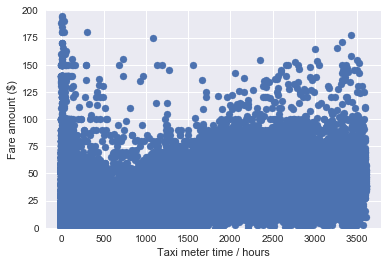

In [308]:
#plt.scatter(test.ride_time_sec/3600, test.fare_amount)
plt.scatter(df.ride_time_sec, df.fare_amount)
plt.ylim(0,200)
plt.xlabel('Taxi meter time / hours')
plt.ylabel('Fare amount ($)')

In [309]:
#test = df[(df['fare_amount'] < 200.00) & (df[df['ride_time_sec'] < 500.0])]
test = df[df['ride_time_sec'] < 500.0]

In [310]:
test['fare_amount'] = (test['fare_amount']-(0.6*test['fare_amount']))

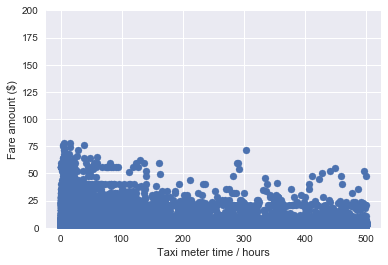

In [311]:
#plt.scatter(test.ride_time_sec/3600, test.fare_amount)
plt.scatter(test.ride_time_sec, test.fare_amount)
plt.ylim(0,200)
plt.xlabel('Taxi meter time / hours')
plt.ylabel('Fare amount ($)')

In [312]:
test.count()

VendorID                 941230
RatecodeID               941230
PULocationID             941230
DOLocationID             941230
passenger_count          941230
trip_distance            941230
fare_amount              941230
extra                    941230
mta_tax                  941230
tip_amount               941230
tolls_amount             941230
improvement_surcharge    941230
total_amount             941230
payment_type             941230
trip_type                941230
dispatch                 941230
PUT                      941230
DOT                      941230
date                     941230
PickUp_hr                941230
TMAX                     941230
day                      941230
month                    941230
ride_time_sec            941230
dtype: int64

In [313]:
df1 = df[df['ride_time_sec'] > 500.0]

In [314]:
df1.count()

VendorID                 1349224
RatecodeID               1349224
PULocationID             1349224
DOLocationID             1349224
passenger_count          1349224
trip_distance            1349224
fare_amount              1349224
extra                    1349224
mta_tax                  1349224
tip_amount               1349224
tolls_amount             1349224
improvement_surcharge    1349224
total_amount             1349224
payment_type             1349224
trip_type                1349224
dispatch                 1349224
PUT                      1349224
DOT                      1349224
date                     1349224
PickUp_hr                1349224
TMAX                     1349224
day                      1349224
month                    1349224
ride_time_sec            1349224
dtype: int64

In [315]:
data = [df1, test]
df3 = pd.concat(data)

In [316]:
df3 = df3[df3['fare_amount'] > 0.00]
df3 = df3[df3['ride_time_sec'] > 0.00]

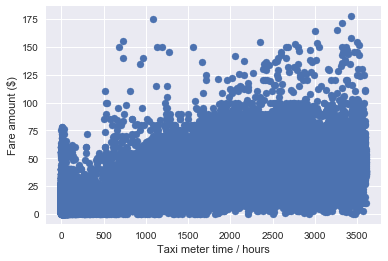

In [317]:
#plt.scatter(test.ride_time_sec/3600, test.fare_amount)
plt.scatter(df3.ride_time_sec, df3.fare_amount)
#plt.ylim(0,200)
plt.xlabel('Taxi meter time / hours')
plt.ylabel('Fare amount ($)')

### Don't want to change next part of the code, passing df3 to df and then deleting all the dataframes that I don't need

In [318]:
df = df3
del df3
del test

In [319]:
df.count()

VendorID                 2290454
RatecodeID               2290454
PULocationID             2290454
DOLocationID             2290454
passenger_count          2290454
trip_distance            2290454
fare_amount              2290454
extra                    2290454
mta_tax                  2290454
tip_amount               2290454
tolls_amount             2290454
improvement_surcharge    2290454
total_amount             2290454
payment_type             2290454
trip_type                2290454
dispatch                 2290454
PUT                      2290454
DOT                      2290454
date                     2290454
PickUp_hr                2290454
TMAX                     2290454
day                      2290454
month                    2290454
ride_time_sec            2290454
dtype: int64

In [320]:
#(23000/2300000)*100

In [321]:
#df3=df.merge(dfw, on='date')

In [322]:
df.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'dispatch', 'PUT', 'DOT', 'date',
       'PickUp_hr', 'TMAX', 'day', 'month', 'ride_time_sec'],
      dtype='object')

'PULocationID' ===> pick up zone <br>
'DOLocationID' ===> drop off zone <br>
Considering pick up only

In [323]:
working_df = df[['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'dispatch', 'PUT', 'DOT',
       'PickUp_hr', 'TMAX', 'day', 'month', 'ride_time_sec']]

In [326]:
del df

In [327]:
working_df['zone'] = working_df[['PULocationID']]

In [328]:
working_df.drop('PULocationID', inplace=True, axis = 1)
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2290454 entries, 1 to 2314017
Data columns (total 23 columns):
VendorID                 int64
RatecodeID               int64
DOLocationID             int64
passenger_count          int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type             int64
trip_type                float64
dispatch                 int64
PUT                      object
DOT                      object
PickUp_hr                int64
TMAX                     int64
day                      int64
month                    int64
ride_time_sec            float64
zone                     int64
dtypes: float64(10), int64(11), object(2)
memory usage: 499.4+ MB


In [331]:
#working_df.count()

In [332]:
working_df.dropna();

In [333]:
working_df.isnull().count()

VendorID                 2290454
RatecodeID               2290454
DOLocationID             2290454
passenger_count          2290454
trip_distance            2290454
fare_amount              2290454
extra                    2290454
mta_tax                  2290454
tip_amount               2290454
tolls_amount             2290454
improvement_surcharge    2290454
total_amount             2290454
payment_type             2290454
trip_type                2290454
dispatch                 2290454
PUT                      2290454
DOT                      2290454
PickUp_hr                2290454
TMAX                     2290454
day                      2290454
month                    2290454
ride_time_sec            2290454
zone                     2290454
dtype: int64

In [334]:
col_mask=working_df.isnull().any(axis=0) 
col_mask

VendorID                 False
RatecodeID               False
DOLocationID             False
passenger_count          False
trip_distance            False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
payment_type             False
trip_type                False
dispatch                 False
PUT                      False
DOT                      False
PickUp_hr                False
TMAX                     False
day                      False
month                    False
ride_time_sec            False
zone                     False
dtype: bool

So, we have some NaN in trip_type!<br>

In [335]:
working_df.trip_type.value_counts()#.sum()

1.0    2253173
2.0      37281
Name: trip_type, dtype: int64

So there are 6 NaN in `trip_type`<br>
Let's fill them with 1.0 as we have more 1's

In [336]:
working_df.trip_type.fillna(value=1.0, inplace=True)
col_mask=working_df.isnull().any(axis=0) 
col_mask
#.value_counts().sum()

VendorID                 False
RatecodeID               False
DOLocationID             False
passenger_count          False
trip_distance            False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
payment_type             False
trip_type                False
dispatch                 False
PUT                      False
DOT                      False
PickUp_hr                False
TMAX                     False
day                      False
month                    False
ride_time_sec            False
zone                     False
dtype: bool

In [337]:
working_df.zone.nunique()#value_counts()

258

In [338]:
grouped = working_df.groupby('zone').count()

In [339]:
#grouped.head()
#grouped.index
"""
zone_list = grouped[
    (grouped['VendorID']>130000) | 
    ((grouped['VendorID']<100000) & (grouped['VendorID']>90000)) |
    ((grouped['VendorID']<70000) & (grouped['VendorID']>60000)) |
    ((grouped['VendorID']<50000) & (grouped['VendorID']>40000)) |
    ((grouped['VendorID']<30000) & (grouped['VendorID']>25000)) |
    ((grouped['VendorID']<10000) & (grouped['VendorID']>8000))   
].index
zone_list
"""
zone_list = grouped[(grouped['VendorID']>30000)].index
zone_list

Int64Index([  7,  25,  33,  41,  42,  49,  65,  66,  74,  75,  82,  95,  97,
            112, 116, 129, 130, 145, 166, 181, 223, 244, 255, 256, 260],
           dtype='int64', name='zone')

In [340]:
#grouped.sort_values(by='VendorID').tail(50)

There was a problem with missing zones while train test spit, I selected the zones with higher ride demand

In [341]:
#zone_list = [82,7,75,41,74]
#zone_list = [74, 255, 244, 130, 49, 260, 116, 61, 40, 247, 196]

In [342]:
#df82 = working_df[working_df.zone == 82]
#df7 = working_df[working_df.zone == 7]
#df75 = working_df[working_df.zone == 75]
#df41 = working_df[working_df.zone == 41]
#df74 = working_df[working_df.zone == 74]

"""
df74 = working_df[working_df.zone == 74]
df255 = working_df[working_df.zone == 255]
df244 = working_df[working_df.zone == 244]
df130 = working_df[working_df.zone == 130]
df49 = working_df[working_df.zone == 49]

df260 = working_df[working_df.zone == 260]
df116 = working_df[working_df.zone == 116]
df61 = working_df[working_df.zone == 61]
df40 = working_df[working_df.zone == 40]
df247 = working_df[working_df.zone == 247]
"""
df2 = working_df[working_df.zone.isin(zone_list)]

In [343]:
#frames = [df82, df7, df75, df41,df74]
#frames = [df74, df255, df244, df130, df49, df260, df116, df61, df40, df247]

In [344]:
#df2 = pd.concat(frames)

In [345]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1713732 entries, 1 to 2314017
Data columns (total 23 columns):
VendorID                 int64
RatecodeID               int64
DOLocationID             int64
passenger_count          int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type             int64
trip_type                float64
dispatch                 int64
PUT                      object
DOT                      object
PickUp_hr                int64
TMAX                     int64
day                      int64
month                    int64
ride_time_sec            float64
zone                     int64
dtypes: float64(10), int64(11), object(2)
memory usage: 313.8+ MB


In [346]:
# Checking for NaN
col_mask=df2.isnull().any(axis=0) 
col_mask

VendorID                 False
RatecodeID               False
DOLocationID             False
passenger_count          False
trip_distance            False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
payment_type             False
trip_type                False
dispatch                 False
PUT                      False
DOT                      False
PickUp_hr                False
TMAX                     False
day                      False
month                    False
ride_time_sec            False
zone                     False
dtype: bool

In [347]:
df2.count()

VendorID                 1713732
RatecodeID               1713732
DOLocationID             1713732
passenger_count          1713732
trip_distance            1713732
fare_amount              1713732
extra                    1713732
mta_tax                  1713732
tip_amount               1713732
tolls_amount             1713732
improvement_surcharge    1713732
total_amount             1713732
payment_type             1713732
trip_type                1713732
dispatch                 1713732
PUT                      1713732
DOT                      1713732
PickUp_hr                1713732
TMAX                     1713732
day                      1713732
month                    1713732
ride_time_sec            1713732
zone                     1713732
dtype: int64

In [74]:
save_path = path1+'/nyc_for_ann.csv'
#save_path

In [70]:
# Created test data with fewer zones
#df2.to_csv(save_path, index=False)

In [71]:
df2 = pd.read_csv(save_path)
df2.head()

,VendorID,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2,1,1,2.90,14.5,0.0,0.5,0.00,0.0,0.3,...,0,0,1,0,0,0,0,0,0,0
1,2,1,6,4.77,16.5,0.5,0.5,0.00,0.0,0.3,...,0,0,1,0,0,0,0,0,0,0
2,2,1,1,1.95,11.5,0.0,0.5,0.00,0.0,0.3,...,0,0,1,0,0,0,0,0,0,0
3,1,1,1,2.20,12.5,0.5,0.5,2.75,0.0,0.3,...,0,0,1,0,0,0,0,0,0,0
4,2,1,1,2.82,13.0,0.5,0.5,1.00,0.0,0.3,...,0,0,1,0,0,0,0,0,0,0


**Creating dummies for `day, month & PickUp_hr`** 

In [72]:
df2.count()

VendorID                 1713732
RatecodeID               1713732
passenger_count          1713732
trip_distance            1713732
fare_amount              1713732
extra                    1713732
mta_tax                  1713732
tip_amount               1713732
tolls_amount             1713732
improvement_surcharge    1713732
total_amount             1713732
dispatch                 1713732
TMAX                     1713732
ride_time_sec            1713732
zone                     1713732
b                        1713732
c                        1713732
d                        1713732
e                        1713732
g                        1713732
1                        1713732
2                        1713732
3                        1713732
4                        1713732
5                        1713732
6                        1713732
7                        1713732
8                        1713732
9                        1713732
10                       1713732
          

### Converting month to name

In [365]:
import calendar
df2['month'] = df2['month'].apply(lambda x: calendar.month_abbr[x])

### Converting payment_type to cat col

In [374]:
def p_type(value):
    if value == 1:
        return 'a'
    elif value == 2:
        return 'b'
    elif value == 3:
        return 'c'
    elif value == 4:
        return 'd'
    else:
        return 'e'

In [367]:
df2['payment_type'] = df2['payment_type'].apply(p_type)

In [368]:
df2.payment_type.unique()

array(['b', 'a', 'c', 'd', 'e'], dtype=object)

### Converting trip_type to cat col

In [375]:
def t_type(value):
    if value == 1.:
        return 'f'
    else: 
        return 'g'

In [380]:
df2['trip_type'] = df2['trip_type'].apply(t_type)

In [382]:
#df2.trip_type.value_counts()

In [369]:
df2.trip_type.unique()

array([ 1.,  2.])

In [383]:
payment_type = pd.get_dummies(df2['payment_type'],drop_first=True)
trip_type = pd.get_dummies(df2['trip_type'],drop_first=True)
PickUp_hr = pd.get_dummies(df2['PickUp_hr'],drop_first=True)
day = pd.get_dummies(df2['day'], drop_first=True)
month = pd.get_dummies(df2['month'],drop_first=True)

In [385]:
df = pd.concat([df2,payment_type,trip_type,PickUp_hr,day,month],axis=1)

In [389]:
df.drop(['payment_type','trip_type','PickUp_hr','day', 'month','DOT','PUT' ],axis=1,inplace=True)
df.columns

Index([             'VendorID',            'RatecodeID',
                'DOLocationID',       'passenger_count',
               'trip_distance',           'fare_amount',
                       'extra',               'mta_tax',
                  'tip_amount',          'tolls_amount',
       'improvement_surcharge',          'total_amount',
                    'dispatch',                  'TMAX',
               'ride_time_sec',                  'zone',
                           'b',                     'c',
                           'd',                     'e',
                           'g',                       1,
                             2,                       3,
                             4,                       5,
                             6,                       7,
                             8,                       9,
                            10,                      11,
                            12,                      13,
                            14,

In [391]:
del df2

In [393]:
# dropping DOLocationID
df.drop(['DOLocationID'] ,axis=1,inplace=True)

### Saving with dummies

In [396]:
#df.to_csv(save_path, index=False)

In [384]:
#payment_type.head()

,b,c,d,e
0,1,0,0,0
1,1,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [290]:
X = df2.drop(['PUT','DOT','zone'],axis=1)
y = df2['zone']

In [292]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713732 entries, 0 to 1713731
Data columns (total 20 columns):
VendorID                 int64
RatecodeID               int64
DOLocationID             int64
passenger_count          int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type             int64
trip_type                float64
dispatch                 int64
PickUp_hr                int64
TMAX                     int64
day                      int64
month                    int64
ride_time_sec            float64
dtypes: float64(10), int64(10)
memory usage: 261.5 MB


In [293]:
#del df2

In [294]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [295]:
y_train.nunique(), y_test.nunique()

(25, 25)

In [296]:
from sklearn.ensemble import RandomForestClassifier

In [297]:
# Creating instance and fitting the model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [298]:
# doing predictions
rfc_pred = rfc.predict(X_test)

In [299]:
from sklearn.metrics import classification_report,confusion_matrix
# Evaluation
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           7       0.52      0.69      0.60     35197
          25       0.25      0.19      0.22     17943
          33       0.32      0.36      0.34     17961
          41       0.38      0.42      0.40     39036
          42       0.36      0.24      0.29     24498
          49       0.34      0.16      0.22     10524
          65       0.23      0.15      0.18     14643
          66       0.37      0.40      0.38     14931
          74       0.47      0.57      0.51     42583
          75       0.52      0.56      0.54     37055
          82       0.42      0.54      0.48     30188
          95       0.61      0.62      0.62     17503
          97       0.31      0.35      0.33     21902
         112       0.39      0.18      0.25     10136
         116       0.40      0.19      0.26     10122
         129       0.37      0.28      0.32     19135
         130       0.62      0.52      0.56      9184
         145       0.61    

### Training test one without TMAX, day, month features

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
# Evaluation
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           7       0.56      0.63      0.59     35681
          25       0.23      0.21      0.22     18053
          33       0.32      0.34      0.33     18138
          41       0.36      0.36      0.36     39617
          42       0.30      0.27      0.28     24546
          49       0.30      0.22      0.25     10633
          65       0.22      0.18      0.20     14878
          66       0.37      0.40      0.38     14698
          74       0.46      0.50      0.48     42614
          75       0.52      0.55      0.53     36998
          82       0.44      0.48      0.46     30520
          95       0.64      0.64      0.64     18047
          97       0.31      0.32      0.31     21909
         112       0.31      0.24      0.27     10131
         116       0.31      0.23      0.26     10655
         129       0.34      0.31      0.32     19151
         130       0.64      0.60      0.62      9251
         145       0.51    

## Let's get some heatmaps

In [84]:
save_path

'/Users/junaidqazi-13/Desktop/_SFU_MS_BigData/Sem_1/ML_726_SFU/Data_ML_Proj/nyc_for_ann_Norm_negative_fare_rides.csv'

In [85]:
save_path = path1+'/nyc_for_ann_Norm_negative_fare_rides.csv'

In [88]:
del df2
df = pd.read_csv(save_path)

In [90]:
df.columns

Index(['VendorID', 'RatecodeID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type',
       'trip_type', 'dispatch', 'PUT', 'DOT', 'PickUp_hr', 'TMAX', 'day',
       'month', 'ride_time_sec', 'zone'],
      dtype='object')

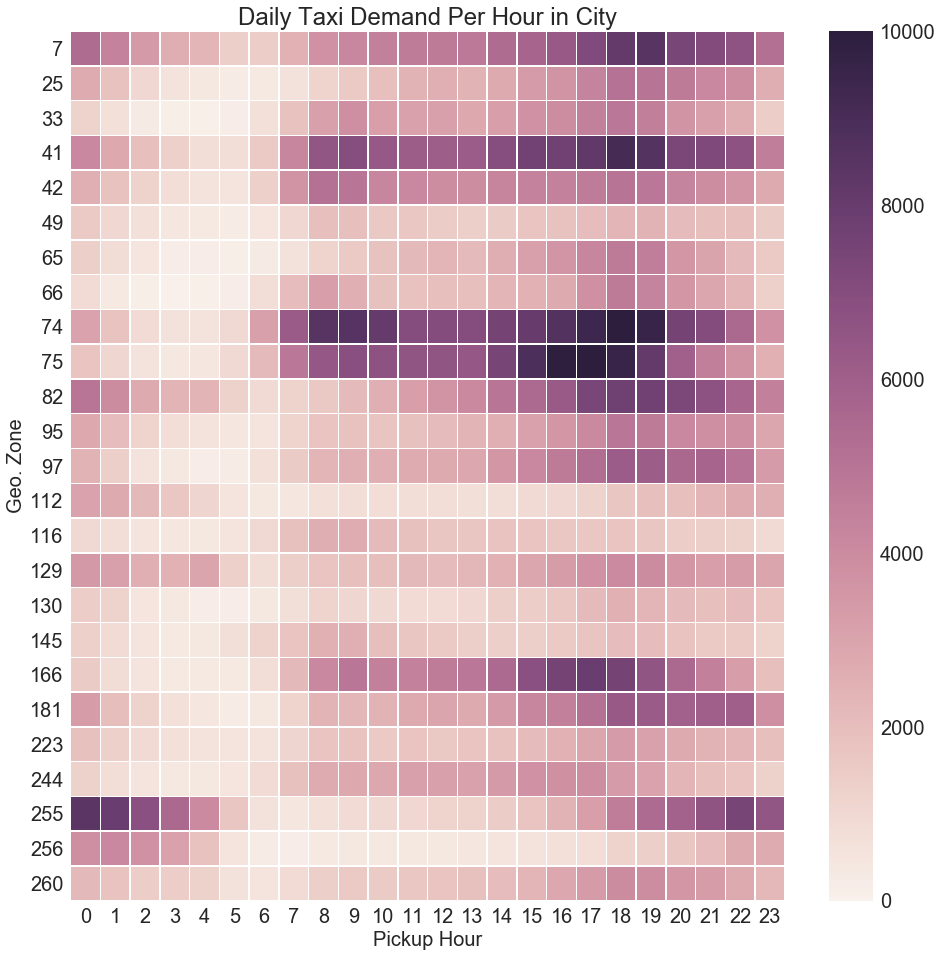

In [202]:
sns.set(font_scale=2.0)
df2=df.groupby(['zone', 'PickUp_hr'])['VendorID'].count()
df2.to_csv('zone_ph_grouped.csv')
df2 = pd.read_csv('zone_ph_grouped.csv', names=['zone','pickup_hr','demand'])
df2 = df2.pivot("zone", "pickup_hr", "demand")
fig, ax = plt.subplots(1, figsize=(16,16))
ax = sns.heatmap(df2, linewidths=.5,vmin=0, vmax=10000)#,
                #cbar_kws={'label': 'Taxi Demand'})# center=df2.loc[7, 5])#, 
                 #cmap = 'YlGnBu', linewidths=.5)#, annot=True)YlGnBu RdBu_r
ax.set_xlabel('Pickup Hour', size = 20)
ax.set_ylabel('Geo. Zone', size = 20)
ax.set_title('Daily Taxi Demand Per Hour in City')
plt.yticks(rotation=0)
fig.savefig("Daily Taxi Demand Per Hour in City", dpi = 200)
#ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],size = 16);
#ax.set_yticklabels([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],size = 16);
#ax.figure.axes[-1].set_ylabel('Taxi Demand / 24 hours', size=20)

In [152]:
#df2.head()

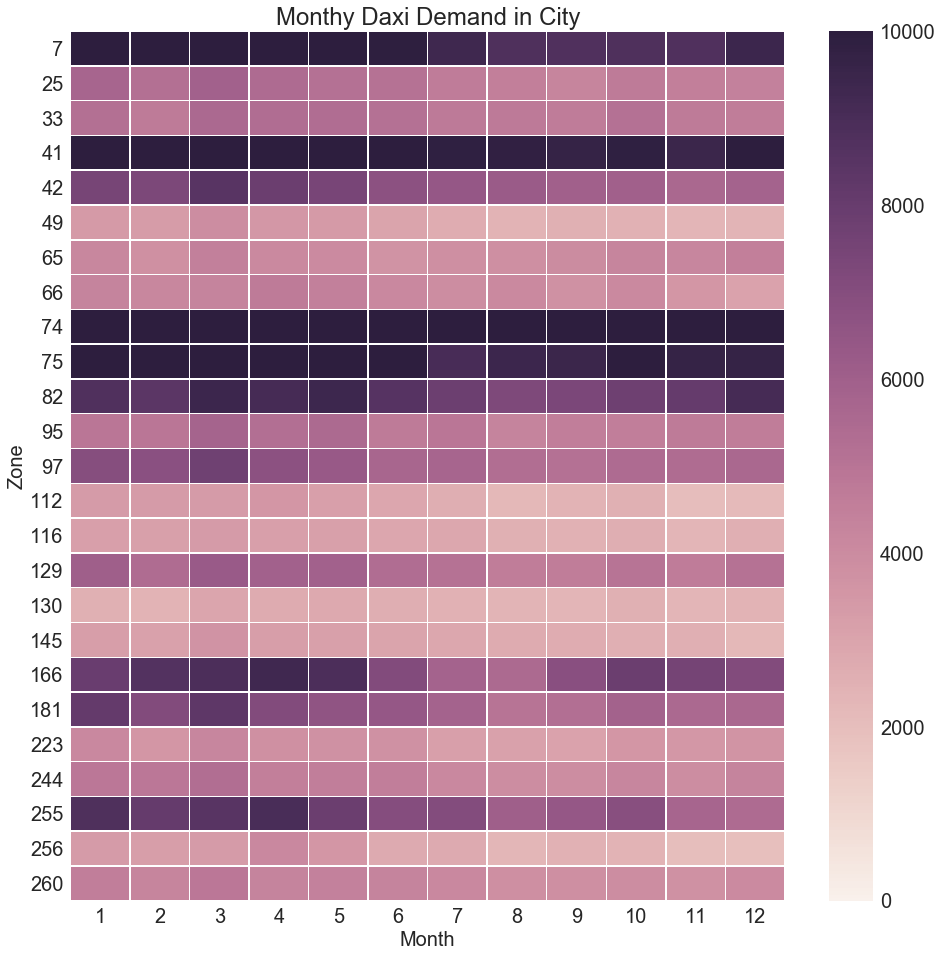

In [203]:
sns.set(font_scale=2.0)
df2=df.groupby(['zone', 'month'])['VendorID'].count()
df2.to_csv('test.csv')
df2 = pd.read_csv('test.csv', names=['zone','month','demand'])
df2 = df2.pivot("zone", "month", "demand")
fig, ax = plt.subplots(1, figsize=(16,16))
ax = sns.heatmap(df2, linewidths=.5,vmin=0, vmax=10000)#, cmap= 'rainbow')
ax.set_xlabel('Month', size = 20)
ax.set_ylabel('Zone', size = 20)#, rotation = 45)
ax.set_title('Monthy Daxi Demand in City')
plt.yticks(rotation=0)
fig.savefig("Monthy Daxi Demand in City.png", dpi = 200)

## Rough work

In [110]:
df2.zone.value_counts()

74    142074
41    131015
75    123685
7     118351
82    101741
Name: zone, dtype: int64

In [39]:
#X_train, X_test = train_test_split(
#    working_df, test_size=0.10, random_state=42)

In [42]:
#X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231406 entries, 583421 to 1253288
Data columns (total 16 columns):
VendorID                 231406 non-null int64
RatecodeID               231406 non-null int64
passenger_count          231406 non-null int64
trip_distance            231406 non-null float64
fare_amount              231406 non-null float64
extra                    231406 non-null float64
mta_tax                  231406 non-null float64
tip_amount               231406 non-null float64
tolls_amount             231406 non-null float64
improvement_surcharge    231406 non-null float64
total_amount             231406 non-null float64
payment_type             231406 non-null int64
trip_type                231406 non-null float64
dispatch                 231406 non-null int64
PickUp_hr                231406 non-null int64
zone                     231406 non-null int64
dtypes: float64(9), int64(7)
memory usage: 30.0 MB


In [43]:
#X_test.to_csv('nyc_for_ann.csv', index=False)

In [45]:
X_test.zone.nunique()

243

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [46]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(243, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [61]:
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=2, batch_size=5, verbose=0)

In [62]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
kfold

KFold(n_splits=10, random_state=101, shuffle=True)

In [65]:
results = cross_val_score(estimator, X_test, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

NameError: name 'dummy_y' is not defined

In [17]:
(working_df.count() - working_df.trip_type.value_counts().sum())['VendorID']

6

So there are 6 NaN in `trip_type`<br>
Let's fill them with 1.0 as we have more 1's

In [18]:
working_df.trip_type.fillna(value=1.0, inplace=True)
col_mask=working_df.isnull().any(axis=0) 
col_mask
#.value_counts().sum()

VendorID                 False
RatecodeID               False
passenger_count          False
trip_distance            False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
payment_type             False
trip_type                False
dispatch                 False
PickUp_hr                False
zone                     False
dtype: bool

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = working_df.drop('zone',axis=1)
y = working_df['zone']

In [21]:
#X = X.as_matrix().astype(np.float)
#y = y.as_matrix().astype(np.float)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [76]:
(X_train.zone.unique()== X_test.zone.unique())

False

In [79]:
X_test.zone.nunique()

243

In [397]:
a=[82,7,75,41,74]

In [398]:
test_df = working_df[working_df.zone.isin(a)]

In [400]:
test_df.zone.value_counts()

74    141258
41    130057
75    122824
7     117667
82    101090
Name: zone, dtype: int64

In [5]:
#results = pd.DataFrame({'known_zone':y_test,'pred_zone':rfc_pred})

In [ ]:
#sns.heatmap(results)

In [ ]:
#type(rfc_pred)

In [60]:
#flights = sns.load_dataset("flights")
#flights = flights.pivot("month", "year", "passengers")
#ax = sns.heatmap(flights)
#flights.head(100)

In [61]:
#flights = flights.pivot("month", "year", "passengers")

In [62]:
#flights.head(100)

In [63]:
#ax = sns.heatmap(flights)

In [15]:
# trying to create a heapmap month, zone, count
#df = pd.read_csv('nyc_for_ann.csv')

In [59]:
#df.columns
#df.groupby(['zone', 'month'])

Index(['VendorID', 'RatecodeID', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type',
       'dispatch', 'PickUp_hr', 'DOLocationID', 'zone'],
      dtype='object')